# Neural network from scratch

In [3]:
#This is an attempt to create a basic neural network from scratch following:
# https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/

In [16]:
#usual imports

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import matplotlib.pyplot as plt1

In [5]:
# Data set to be added

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


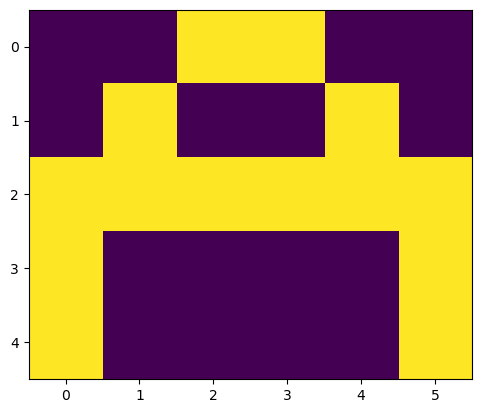

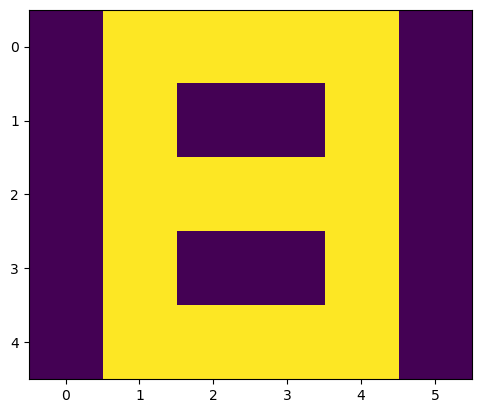

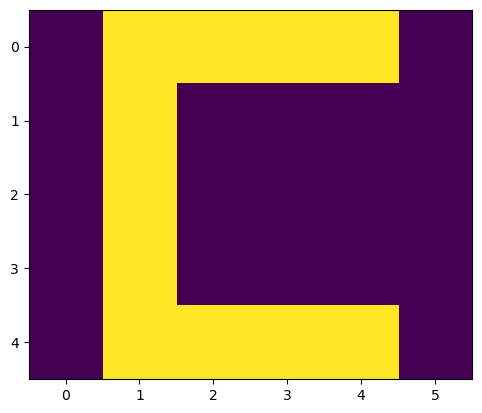

In [6]:
# Visualising the data

plt.imshow(np.array(a).reshape(5, 6))
plt.show()

plt.imshow(np.array(b).reshape(5, 6))
plt.show()

plt.imshow(np.array(c).reshape(5, 6))
plt.show()

In [6]:

# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
pprint(x)
pprint(y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]),
 array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]),
 array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])]
array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])


In [7]:
# activation function
 
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

In [8]:
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
    # hidden
    z1 = x @ w1# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 

    # Output layer
    z2 = a1 @ w2# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return a2

# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return np.array(l).reshape(x, y)

# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):

    # hidden layer
    z1 = x @ w1# input from layer 1 
    a1 = sigmoid(z1)# output of layer 2 

    # Output layer
    z2 = a1 @ w2# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2 @ d2.T).T, 
                                (np.multiply(a1, 1-a1)))

    # Gradient for w1 and w2
    w1_adj = x.T @ d1
    w2_adj = a1.T @ d2

    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show() 

In [14]:
#Initialising the weights

w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
pprint(w1)
pprint(w2)

array([[-1.49064440e+00,  1.13281266e+00,  1.39720765e+00,
        -1.77904666e+00,  2.66276736e+00],
       [ 4.30871884e-01,  3.47966874e-01,  6.84269291e-01,
        -9.02474239e-01,  9.14476531e-02],
       [ 1.68746201e+00, -2.50640709e-02,  1.18920582e+00,
         1.55027715e+00, -6.24683496e-01],
       [-1.49423224e+00,  6.99401157e-01,  1.06861209e+00,
        -1.07046617e+00,  2.49694885e-01],
       [ 4.73441129e-01,  1.77622575e-01, -6.98612655e-01,
         3.17032487e-01, -1.15201841e+00],
       [-2.33128915e-01, -1.31941667e-01, -9.23028286e-01,
         3.70592931e-01,  1.48946550e+00],
       [ 3.91899163e-01,  2.27545569e+00, -4.18898159e-01,
        -1.53212246e-01,  1.59938173e+00],
       [-9.04331320e-01,  1.28438972e-01,  7.21630630e-01,
         5.05317823e-01,  1.27408982e+00],
       [ 2.43594325e-01, -1.31002544e+00,  8.17019330e-01,
         2.22488003e-01, -1.27511209e+00],
       [ 1.60708361e+00,  7.79300968e-01,  9.00826063e-01,
        -3.78647380e-01

In [15]:
#Training the model

"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 70.76473986853739
epochs: 2 ======== acc: 75.3891105822355
epochs: 3 ======== acc: 77.11504680836173
epochs: 4 ======== acc: 78.0921838032183
epochs: 5 ======== acc: 78.86174828433275
epochs: 6 ======== acc: 79.54456396202664
epochs: 7 ======== acc: 80.17216478280402
epochs: 8 ======== acc: 80.75576027217421
epochs: 9 ======== acc: 81.30173550777229
epochs: 10 ======== acc: 81.8152413181052
epochs: 11 ======== acc: 82.30086943875227
epochs: 12 ======== acc: 82.76266996780673
epochs: 13 ======== acc: 83.20409597352213
epochs: 14 ======== acc: 83.6279983763136
epochs: 15 ======== acc: 84.03667134232393
epochs: 16 ======== acc: 84.43192552406829
epochs: 17 ======== acc: 84.8151700679072
epochs: 18 ======== acc: 85.18749185625207
epochs: 19 ======== acc: 85.54972625203251
epochs: 20 ======== acc: 85.9025171471453
epochs: 21 ======== acc: 86.24636606189314
epochs: 22 ======== acc: 86.5816710562563
epochs: 23 ======== acc: 86.90875670576284
epochs: 24 ======== acc: 87

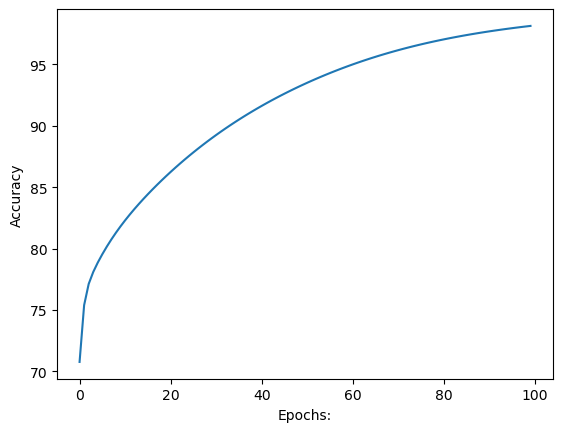

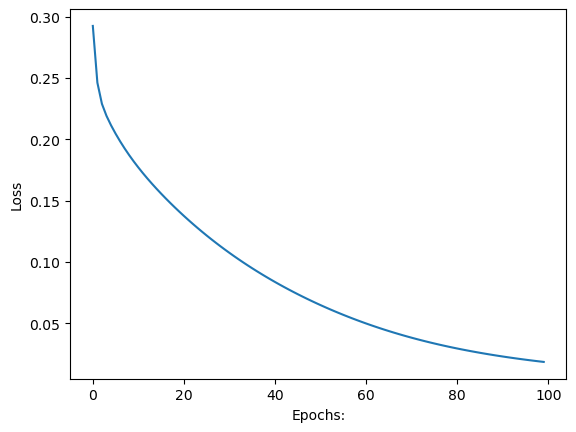

In [17]:
# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [18]:
#The final trained weights

pprint(w1)
pprint(w2)

array([[-1.4906444 ,  1.13281266,  1.39720765, -1.77904666,  2.66276736],
       [ 0.61347281,  0.44481268,  0.66813927, -1.04484832, -0.35241025],
       [ 1.86194123,  0.25967121,  1.44097974,  1.40274587, -0.69319701],
       [-1.31975303,  0.98413643,  1.32038601, -1.21799744,  0.18118137],
       [ 0.65604205,  0.27446838, -0.71474268,  0.1746584 , -1.59587631],
       [-0.23312891, -0.13194167, -0.92302829,  0.37059293,  1.4894655 ],
       [ 0.39189916,  2.27545569, -0.41889816, -0.15321225,  1.59938173],
       [-0.7298521 ,  0.41317425,  0.97340455,  0.35778655,  1.20557631],
       [ 0.24359432, -1.31002544,  0.81701933,  0.222488  , -1.27511209],
       [ 1.60708361,  0.77930097,  0.90082606, -0.37864738,  1.11468888],
       [-1.15216397,  0.7892432 , -1.63351541, -0.18037167, -0.0104372 ],
       [ 0.47198726, -0.35804349, -1.05130264,  0.98898476, -0.99291524],
       [-0.92086531,  1.08382793,  1.37546881,  0.84832991,  1.15251858],
       [-0.13025392,  0.96258405,  0.5

Image is of letter A.


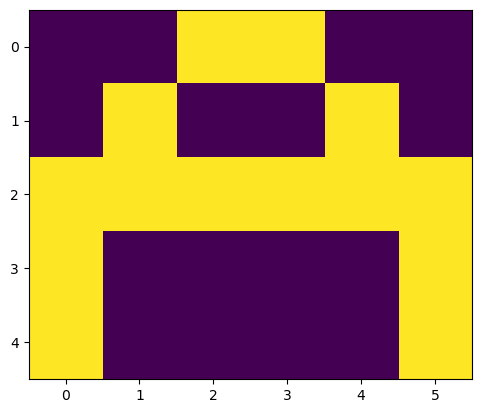

In [23]:
#An example of a prediction

"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[0], w1, w2)

In [21]:
len(x)

3